In [11]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.loader import load_data
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Use correct path from notebooks/
df = load_data(
    ops_path='../data/operations_daily_365d.csv',
    meta_path='../data/site_meta.csv'
)

df.head()


,date,site_id,units_produced,downtime_minutes,power_kwh,rework_units,defects_ppm,staff_count,material_cost_per_unit,price_per_unit,temperature_c,rainfall_mm,holiday_flag,region,commissioned_year,shift_hours_per_day,site_age
0,2025-01-01,S1,1280,34,4211,27,453,56,71.94,96.04,21.7,0.0,0,South,2018,20,7
1,2025-01-02,S1,1249,193,5471,40,480,55,71.87,95.90,22.4,0.0,0,South,2018,20,7
2,2025-01-03,S1,1163,43,4178,33,454,53,72.04,96.11,22.7,0.0,0,South,2018,20,7
3,2025-01-04,S1,1348,32,4554,35,387,54,72.26,95.99,22.7,0.0,0,South,2018,20,7
4,2025-01-05,S1,0,0,0,0,0,0,0.00,0.00,21.9,0.0,1,South,2018,20,7


In [7]:
# Summary statistics
df.describe()


,date,units_produced,downtime_minutes,power_kwh,rework_units,defects_ppm,staff_count,material_cost_per_unit,price_per_unit,temperature_c,rainfall_mm,holiday_flag,commissioned_year,shift_hours_per_day,site_age
count,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2025-07-01 23:59:59.999999744,1207.762329,61.685616,4274.854110,26.997945,423.368493,51.546575,66.695411,89.976575,27.929315,0.540274,0.065753,2017.250000,20.000000,7.750000
min,2025-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.800000,0.000000,0.000000,2015.000000,16.000000,5.000000
25%,2025-04-02 00:00:00,1116.000000,42.000000,3961.500000,22.000000,375.000000,50.000000,70.180000,94.840000,23.900000,0.000000,0.000000,2015.750000,19.000000,6.500000
50%,2025-07-02 00:00:00,1276.000000,56.000000,4456.000000,28.000000,446.000000,55.000000,71.480000,95.395000,27.800000,0.000000,0.000000,2017.000000,20.000000,8.000000
75%,2025-10-01 00:00:00,1422.000000,69.000000,4955.000000,34.000000,509.000000,58.000000,72.300000,97.835000,32.000000,0.000000,0.000000,2018.500000,21.000000,9.250000
max,2025-12-31 00:00:00,1882.000000,333.000000,7970.000000,52.000000,774.000000,67.000000,73.520000,99.810000,36.400000,12.700000,1.000000,2020.000000,24.000000,10.000000
std,NaN,372.807641,47.356136,1348.800593,10.261522,142.936547,14.513113,17.735463,23.942602,4.418956,1.677409,0.247936,1.920944,2.829396,1.920944


In [8]:
# Data types and nulls
df.info()
df.isnull().sum()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1460 non-null   datetime64[ns]
 1   site_id                 1460 non-null   object        
 2   units_produced          1460 non-null   int64         
 3   downtime_minutes        1460 non-null   int64         
 4   power_kwh               1460 non-null   int64         
 5   rework_units            1460 non-null   int64         
 6   defects_ppm             1460 non-null   int64         
 7   staff_count             1460 non-null   int64         
 8   material_cost_per_unit  1460 non-null   float64       
 9   price_per_unit          1460 non-null   float64       
 10  temperature_c           1460 non-null   float64       
 11  rainfall_mm             1460 non-null   float64       
 12  holiday_flag            1460 non-null   int64   

date                      0
site_id                   0
units_produced            0
downtime_minutes          0
power_kwh                 0
rework_units              0
defects_ppm               0
staff_count               0
material_cost_per_unit    0
price_per_unit            0
temperature_c             0
rainfall_mm               0
holiday_flag              0
region                    0
commissioned_year         0
shift_hours_per_day       0
site_age                  0
dtype: int64

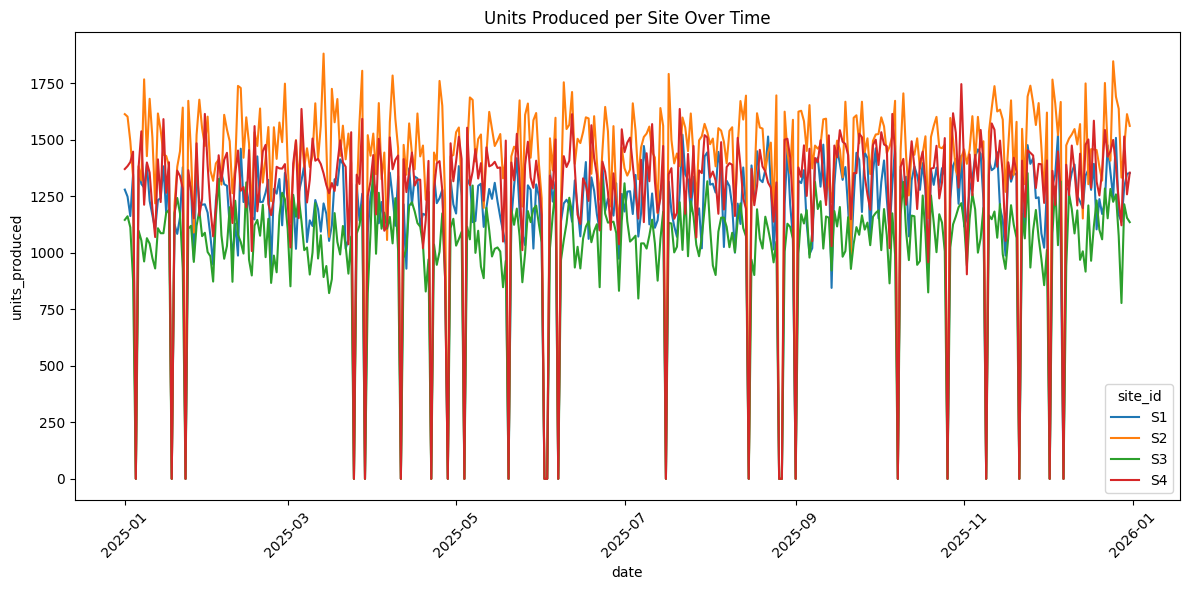

In [9]:
# Units Produced Over Time by Site
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='units_produced', hue='site_id')
plt.title('Units Produced per Site Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
